## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Creating Functions

In [2]:
# ## printing the shape and head
# def head(df,shape_only=False):
#     print(df.shape)

#     if shape_only:
#         return
#     else:
#         return df.head()

# ## for EDA of categorical values
# def eda_bivariate_categorical(df,column,target):

#     fig,ax = plt.subplots(figsize = (9,8))

#     color = 'Set2'

#     palette_color = sns.color_palette(color)

#     ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
#     ax.set_ylabel('Count')

#     offset = df[column].value_counts().max() * 0.005

#     list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

#     patches = ax.patches
#     bars_pos = 0

#     for i in range(df[target].nunique()):
#         for j in range(df[column].nunique()):
#             list_bars_col = list_bars[j] 
#             total_sum = list_bars_col.sum()
#             value = list_bars_col[i]

#             percentage = value / total_sum

#             if percentage == 0:
#                 bars_pos += 1
#                 continue
#             else:
#                 x = patches[bars_pos].get_x() + patches[j].get_width()/2
#                 y = patches[bars_pos].get_height() + offset
#                 ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
#                 bars_pos += 1
#     plt.show()

# ## Function that plots numerical variables into histogram and violin plot
# def eda_bivariate_numerical(data,column,target,color,
#                     figsize=(12,6),
#                     # save=True,
#                     val=0,
#                     target_type = 'Numerical'):

#     fig, axes = plt.subplots(1, 2, figsize=figsize)
#     cmap = sns.color_palette(color)
#     val = val

#     for i in range(1):
#         for j in range(2):
#             if j==0:
#                     sns.histplot(data = data,x=data[column],hue=target,
#                                 bins=50,kde=True,palette=color,ax=axes[j])
#                     axes[j].set(xlabel=None)
#                     axes[j].grid(False)
#             elif j==1:
#                 sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
#                 )
#                 axes[j].set(xlabel=None)
#                 axes[j].grid(False)
#                 val += 1
#                 plt.tight_layout()
#             if target_type == 'Numerical':
#                 plt.suptitle(column)
#             else:
#                 plt.suptitle(f'{column} vs. {target}')
#     plt.show()
    
#     # path = 'Figures\\Numerical\\'
#     # if save:
#     #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


# ## print text to see the font
# def print_text(text):
#     fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
#     ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
#     ax.axis("off")
#     plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Function for printing the shape and head of a dataframe
def print_shape_and_head(df, shape_only=False):
    print(df.shape)

    if shape_only:
        return
    else:
        return df.head()

## Function for EDA of categorical values
def plot_bivariate_categorical(df, column, target):
    fig, ax = plt.subplots(figsize=(9, 8))
    color = 'Set2'
    palette_color = sns.color_palette(color)

    ax = sns.countplot(x=column, data=df, hue=target, palette=color, order=df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column, target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j]
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width() / 2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')
                bars_pos += 1

    plt.show()


## Function that plots numerical variables into histogram and violin plot
def plot_bivariate_numerical(data, column, target, color, figsize=(12, 6), val=0, target_type='Numerical'):
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sns.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j == 0:
                sns.histplot(data=data, x=data[column], hue=target, bins=50, kde=True, palette=color, ax=axes[j])
                axes[j].set(xlabel=None)
                axes[j].grid(False)
            elif j == 1:
                sns.boxplot(data=data, x=data[column], y=target, ax=axes[j], palette=color, orient='h')
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    
    plt.show()


## Function for printing text
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()


## Reading Dataset and Showing its Description

In [4]:
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
## Setting the target variable
target = 'Heart_Disease'

In [6]:
## Identifying numerical and categorical columns
numerical= df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

In [7]:
## Displaying the columns in alphabetical order
columns_sorted = df.columns.sort_values()
print(columns_sorted)

## Displaying the statistics for numerical variables
print('')
num_describe = df.describe().T
num_describe_table = num_describe.loc[:, ['mean', 'std', '25%', '50%', '75%']]
print(num_describe_table)

## Displaying the statistics for categorical variables
print('')
object_describe_table = df.describe(include=object)
print(object_describe_table)


Index(['Age_Category', 'Alcohol_Consumption', 'Arthritis', 'BMI', 'Checkup',
       'Depression', 'Diabetes', 'Exercise', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'General_Health', 'Green_Vegetables_Consumption',
       'Heart_Disease', 'Height_(cm)', 'Other_Cancer', 'Sex', 'Skin_Cancer',
       'Smoking_History', 'Weight_(kg)'],
      dtype='object')

                                    mean        std     25%     50%     75%
Height_(cm)                   170.615249  10.658026  163.00  170.00  178.00
Weight_(kg)                    83.588655  21.343210   68.04   81.65   95.25
BMI                            28.626211   6.522323   24.21   27.44   31.85
Alcohol_Consumption             5.096366   8.199763    0.00    1.00    6.00
Fruit_Consumption              29.835200  24.875735   12.00   30.00   30.00
Green_Vegetables_Consumption   15.110441  14.926238    4.00   12.00   20.00
FriedPotato_Consumption         6.296616   8.582954    2.00    4.00    8.00

       General_Health 

## Exploratory Data Analysis (EDA)

### Target Variable

#### Categorical

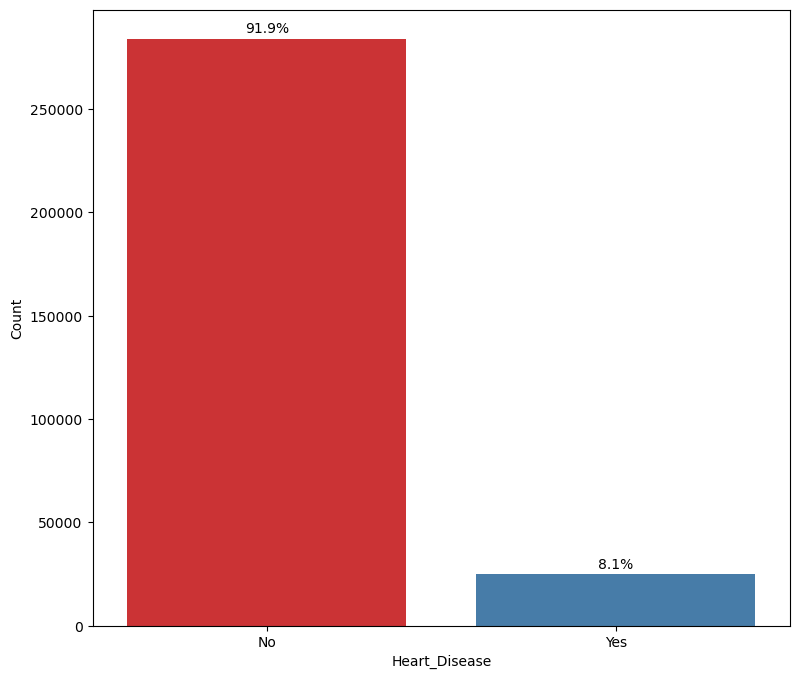

In [8]:
fig, ax = plt.subplots(figsize=(9, 8))
color = 'Set1'
new_palette = sns.color_palette(color)

ax = sns.countplot(x=target,
                   data=df,
                   palette=new_palette,
                   order=df[target].value_counts().index)
ax.set_ylabel('Count')

patches = ax.patches

for j in range(len(patches)):
    percentage = list(df[target].value_counts())[j] / df[target].value_counts().sum()
    offset = df[target].value_counts().max() * 0.01
    x = patches[j].get_x() + patches[j].get_width() / 2
    y = patches[j].get_height() + offset
    ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')

plt.show()


### Univariate Analysis

General_Health


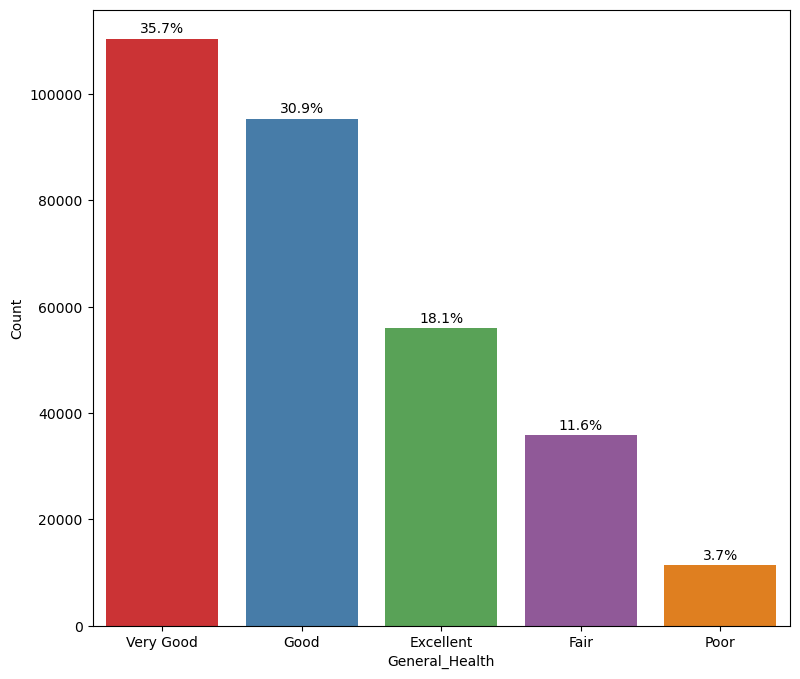

Checkup


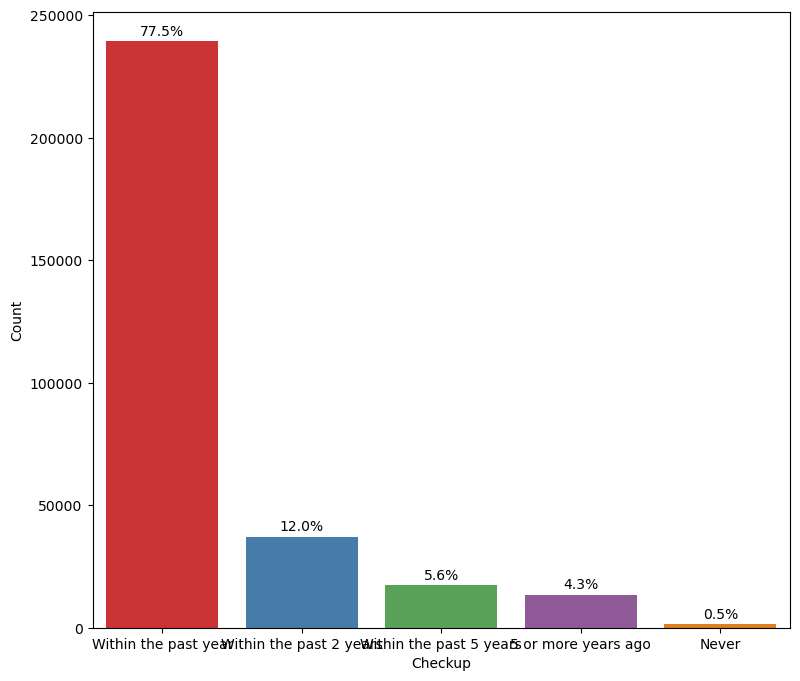

Exercise


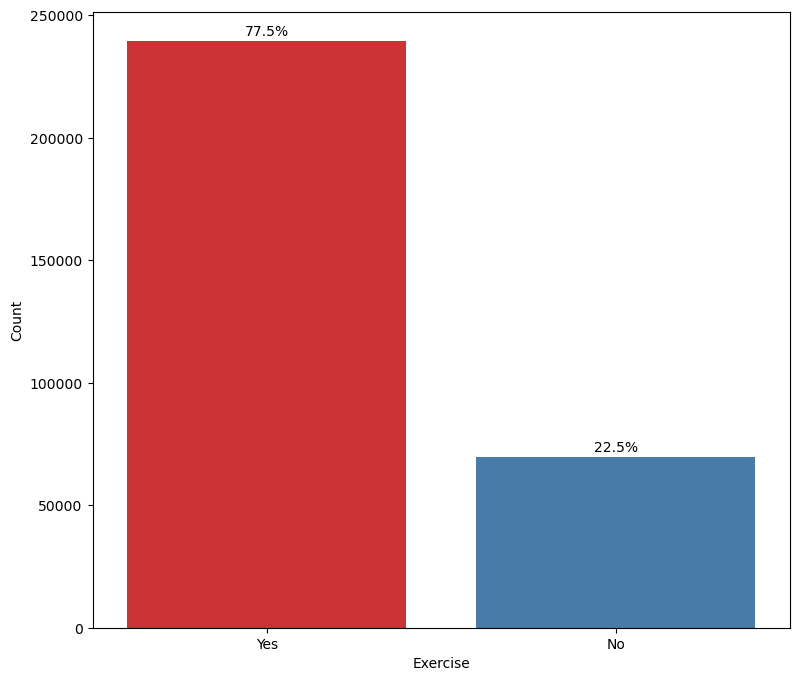

Skin_Cancer


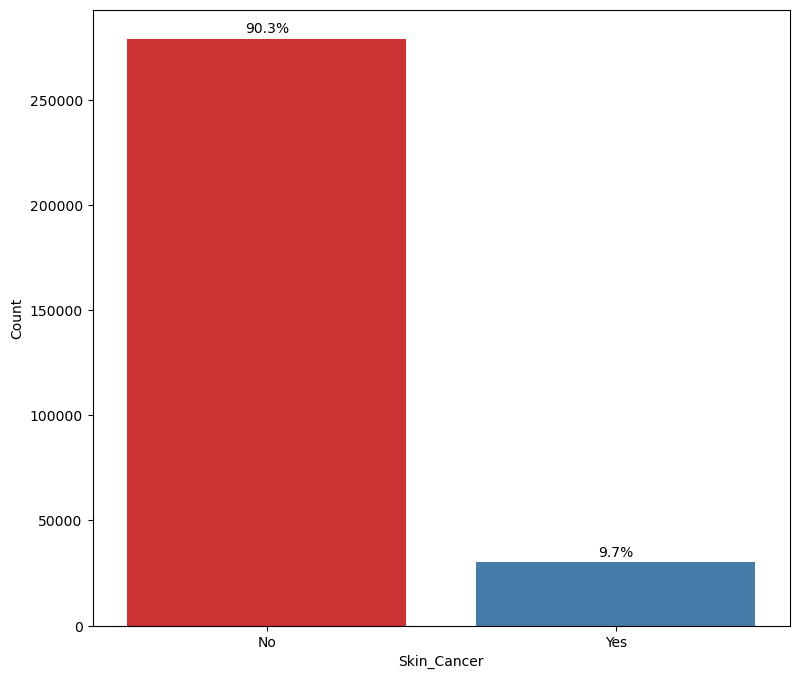

Other_Cancer


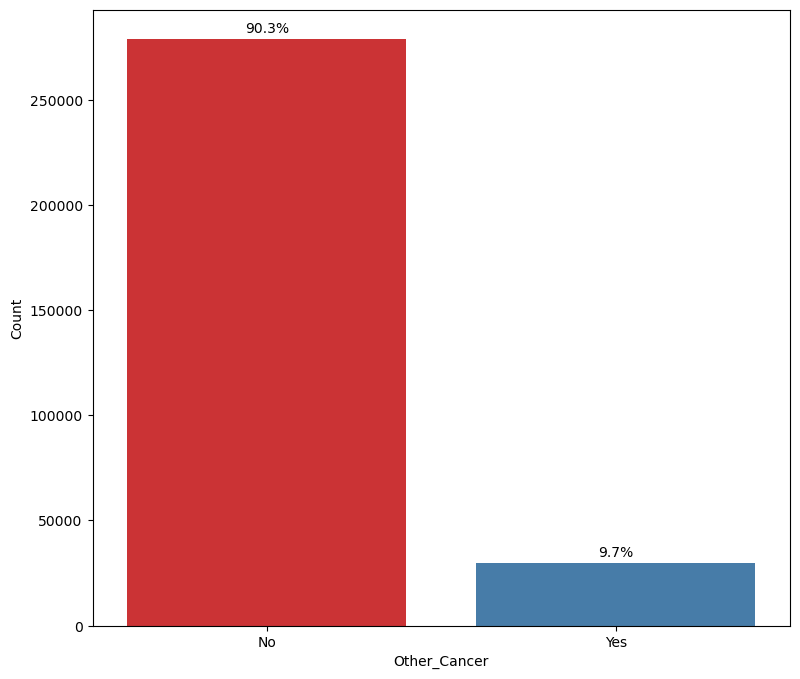

Depression


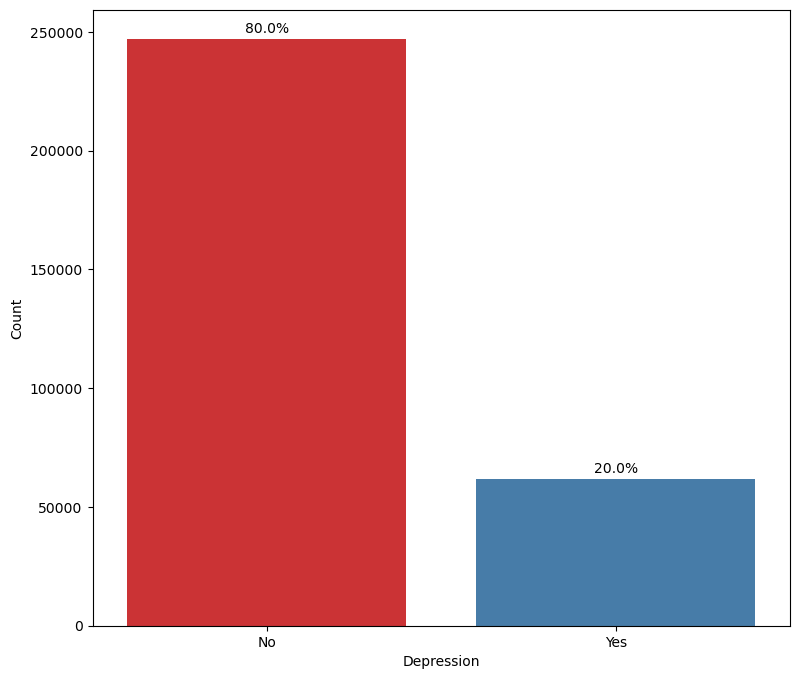

Diabetes


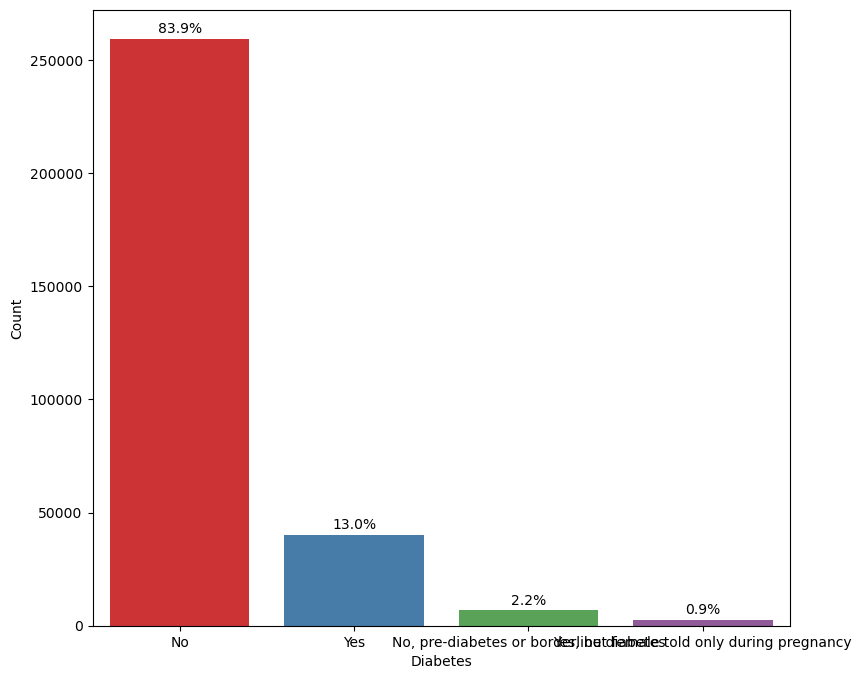

Arthritis


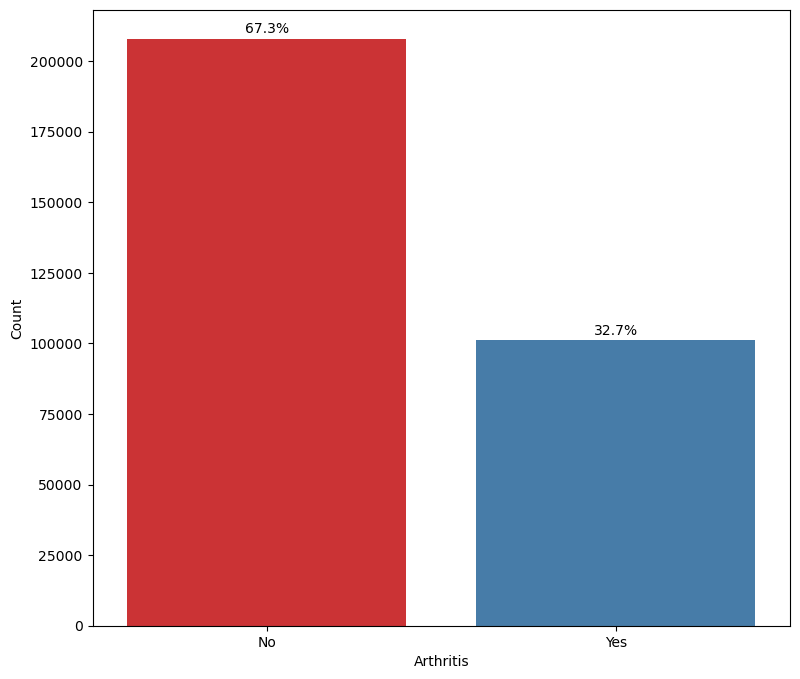

Sex


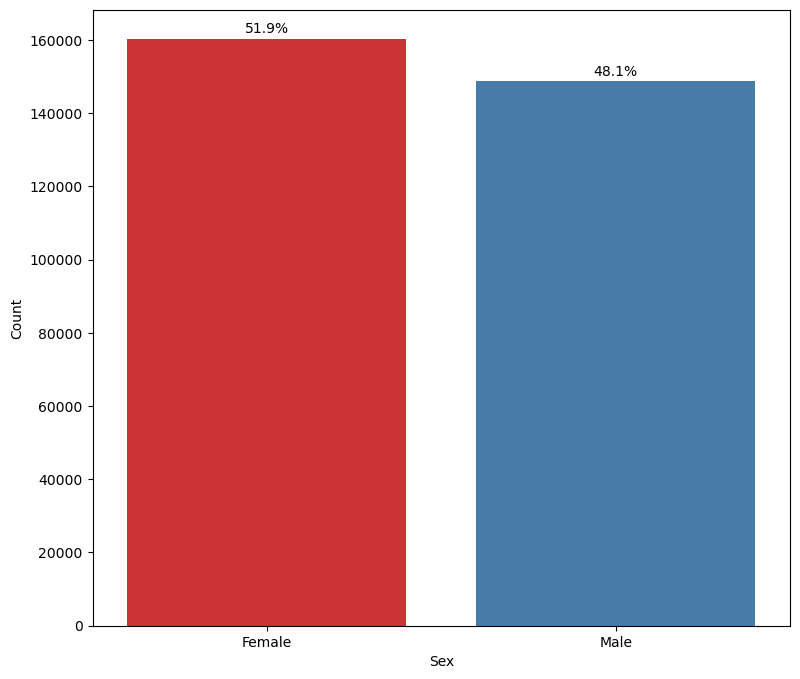

Age_Category


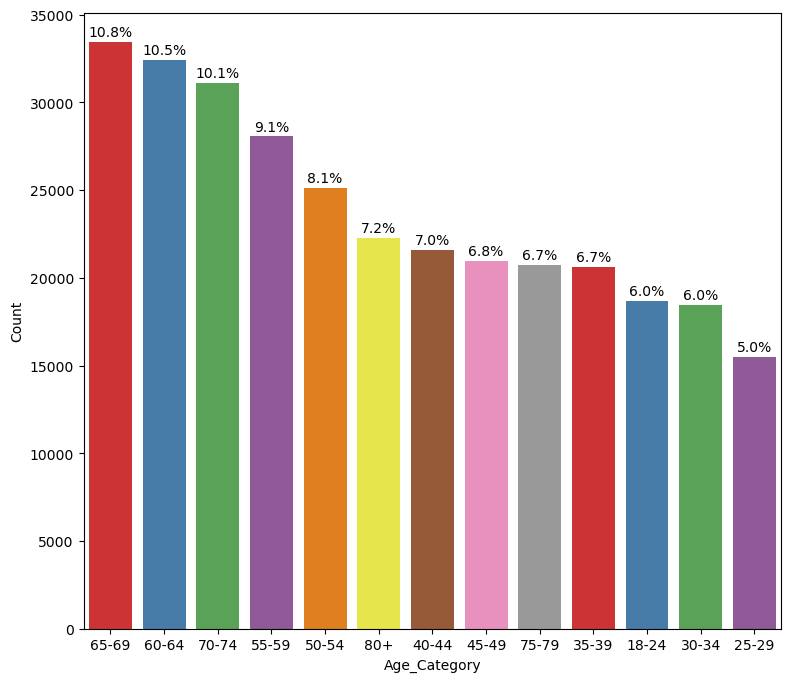

Height_(cm)


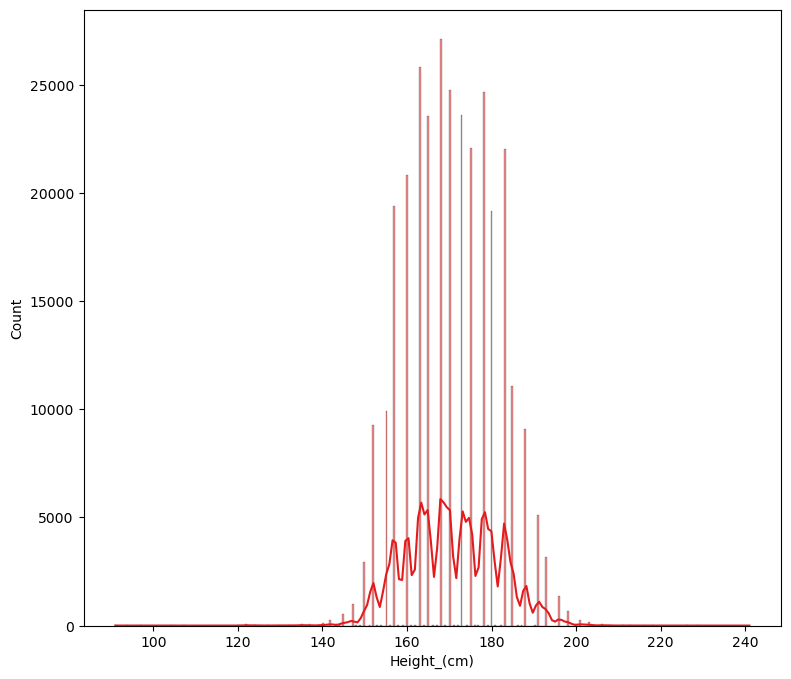

Weight_(kg)


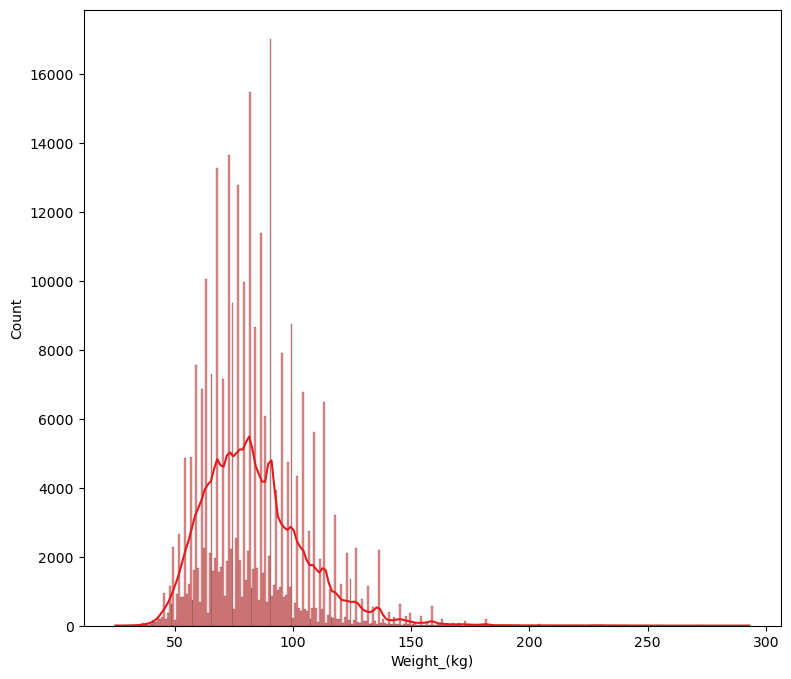

BMI


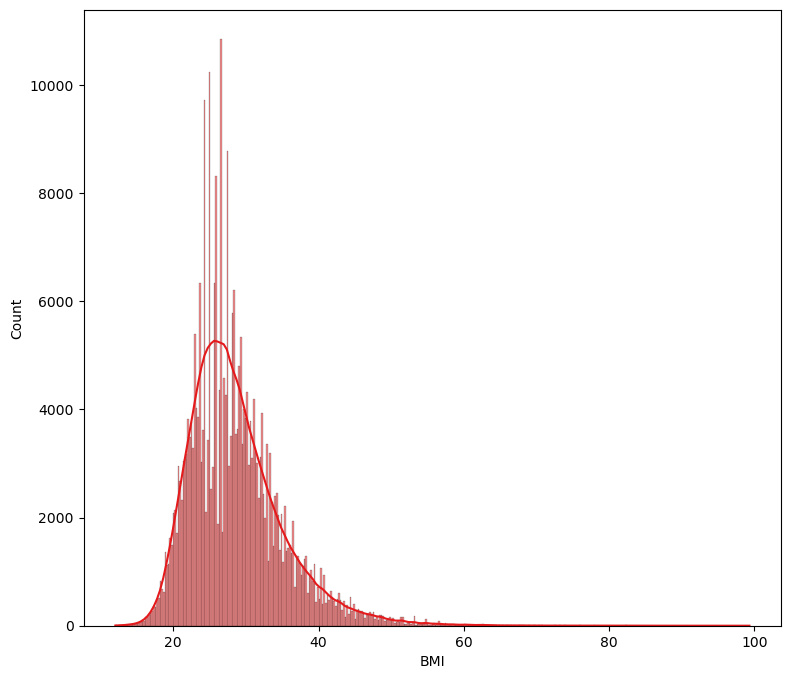

Smoking_History


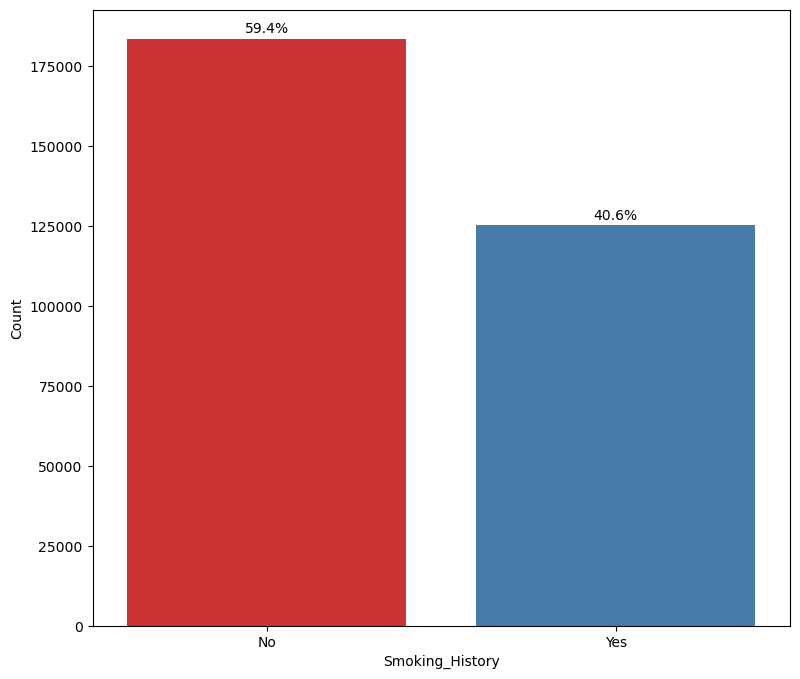

Alcohol_Consumption


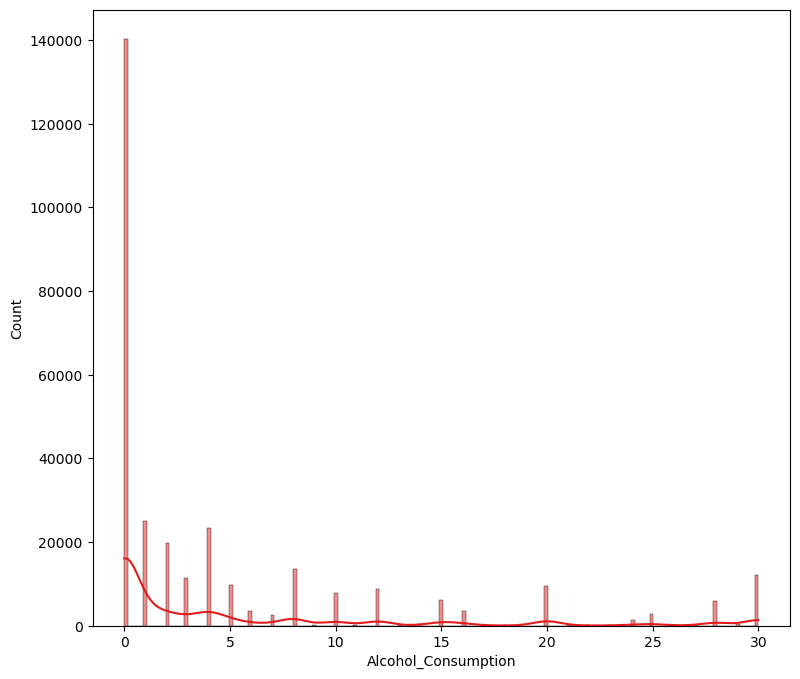

Fruit_Consumption


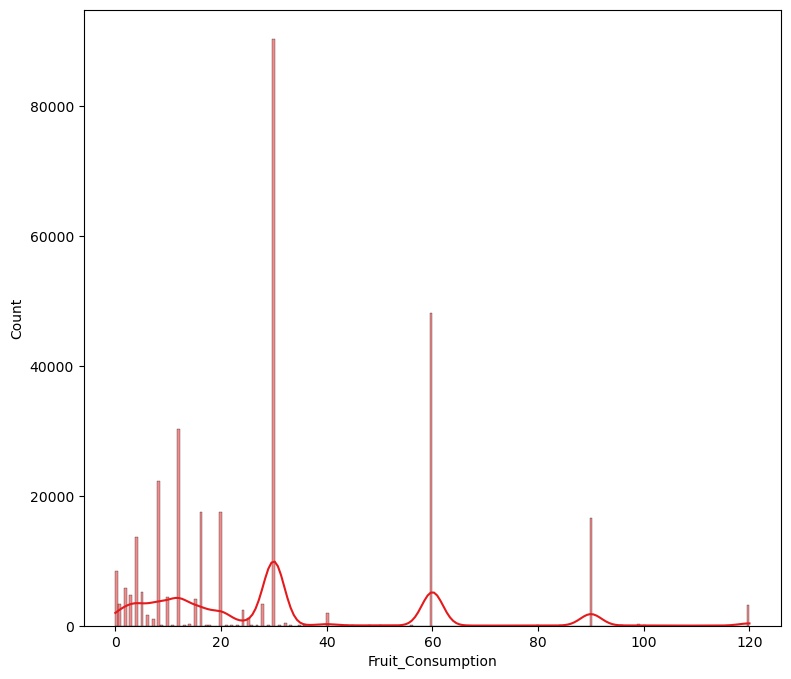

Green_Vegetables_Consumption


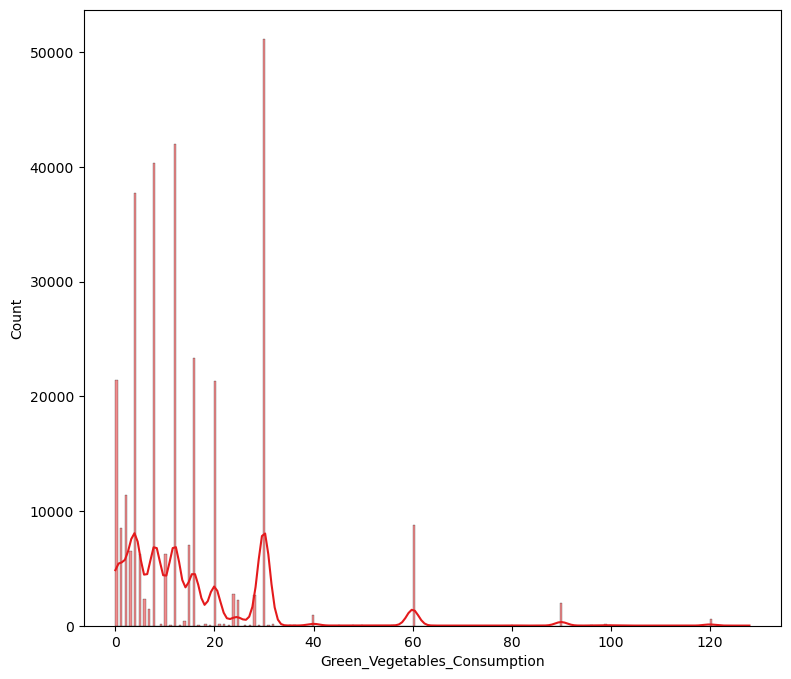

FriedPotato_Consumption


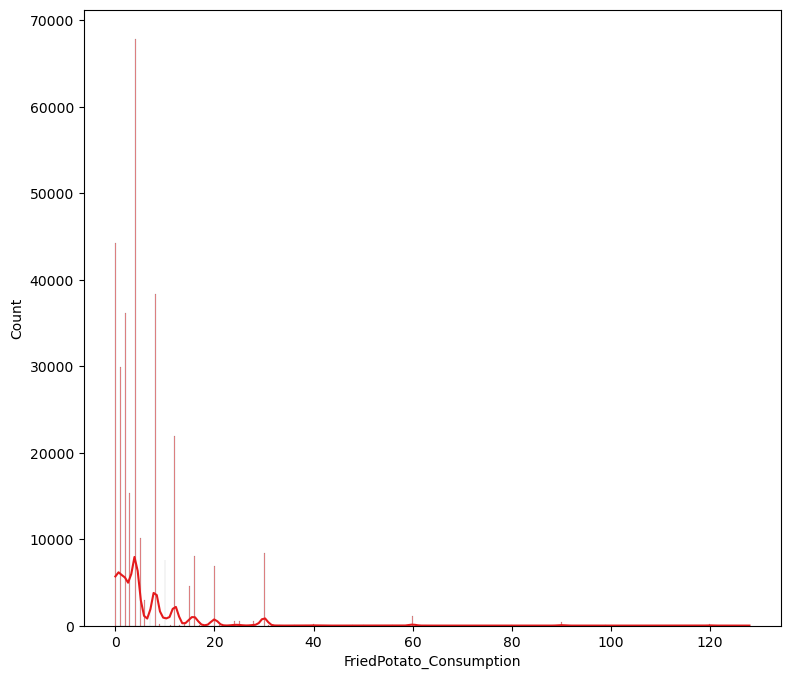

In [9]:
for i in df.columns:
    if i == target:
        continue

    if i in categorical:
        if df[i].nunique() > 15:
            print(f"Column '{i}' has many unique values (n = {df[i].nunique()}) and will not be plotted")
            print('=======================================================')
            continue
        else:
            print(f"{i}")
            fig, ax = plt.subplots(figsize=(9, 8))
            color = 'Set1'
            palette_color = sns.color_palette(color)
            ax = sns.countplot(x=i, data=df, palette=color, order=df[i].value_counts().index)
            ax.set_ylabel('Count')

            patches = ax.patches

            for j in range(len(patches)):
                offset = df[i].value_counts().max() * 0.01
                percentage = list(df[i].value_counts())[j] / df[i].value_counts().sum()
                x = patches[j].get_x() + patches[j].get_width() / 2
                y = patches[j].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage * 100), (x, y), ha='center')

            plt.show()
            print('=======================================================')

    elif i in numerical:
        print(f"{i}")
        fig, ax = plt.subplots(figsize=(9, 8))
        color = 'Set1'
        palette_color = sns.color_palette(color)
        ax = sns.histplot(x=i, data=df, kde=True, color=palette_color[0])
        ax.set_ylabel('Count')
        plt.show()
        print('=======================================================')


### Bivariate Analysis for Classification

#### Categorical

Age_Category vs. Heart_Disease


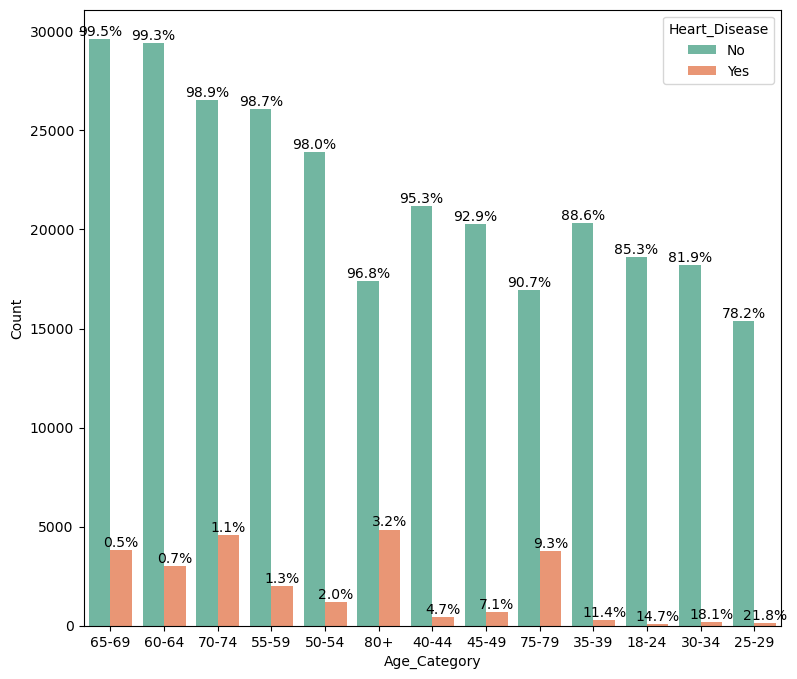

Arthritis vs. Heart_Disease


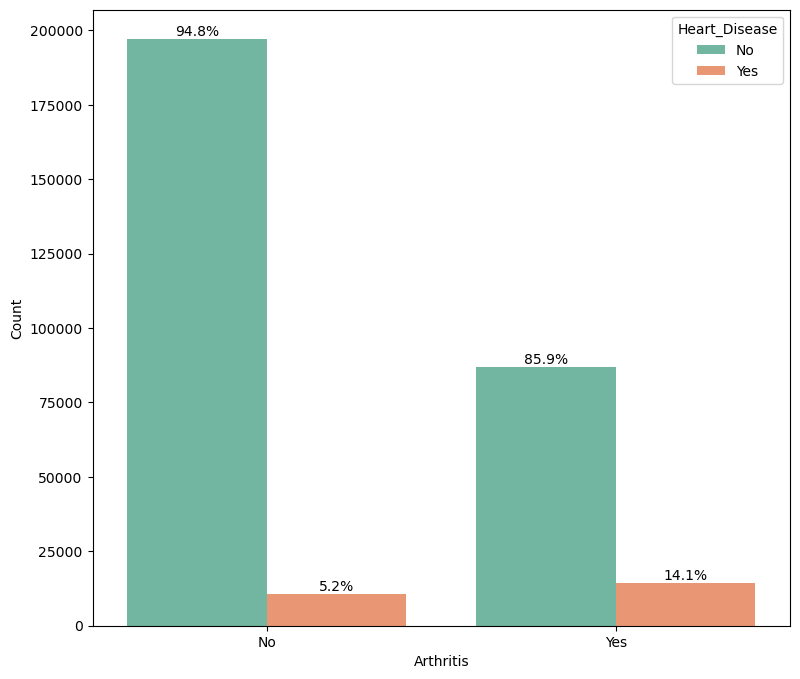

Checkup vs. Heart_Disease


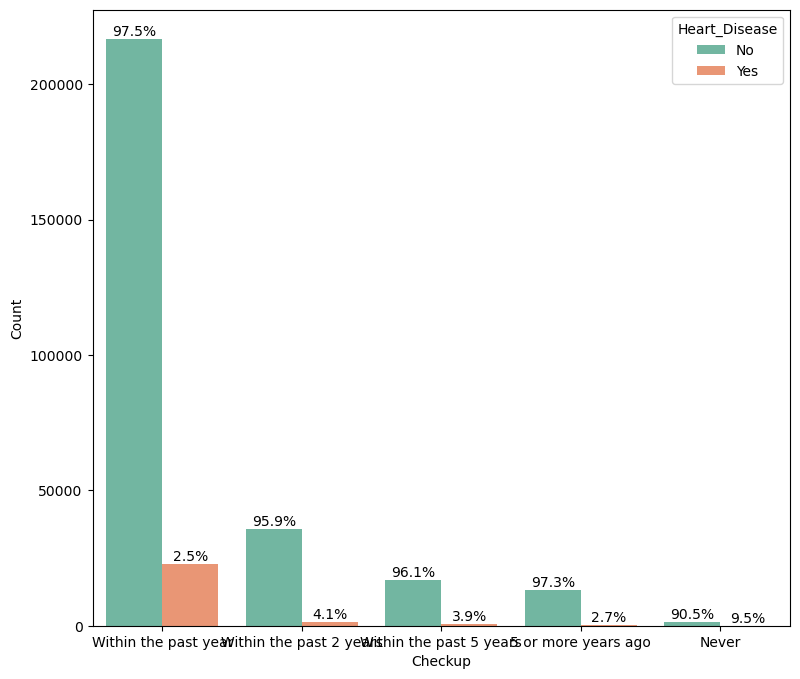

Depression vs. Heart_Disease


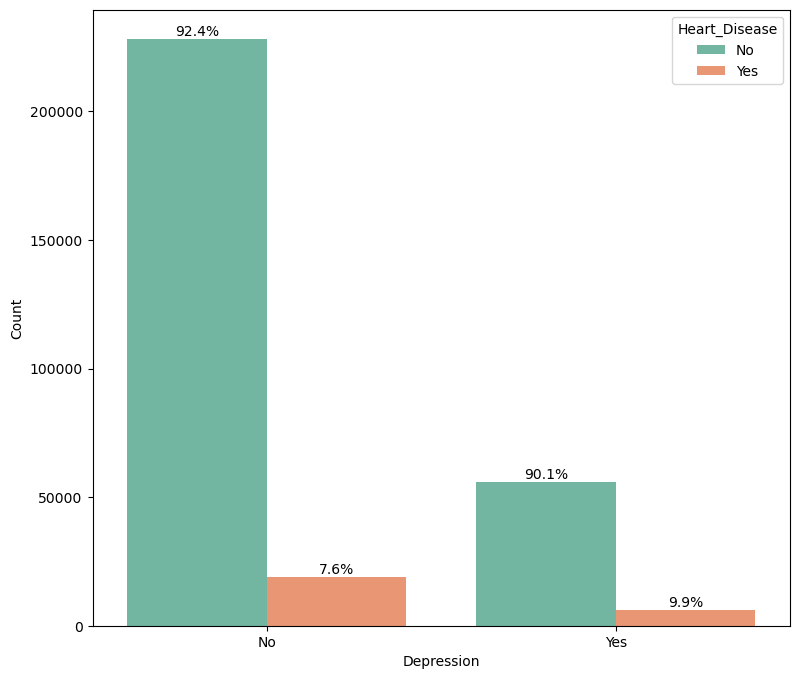

Diabetes vs. Heart_Disease


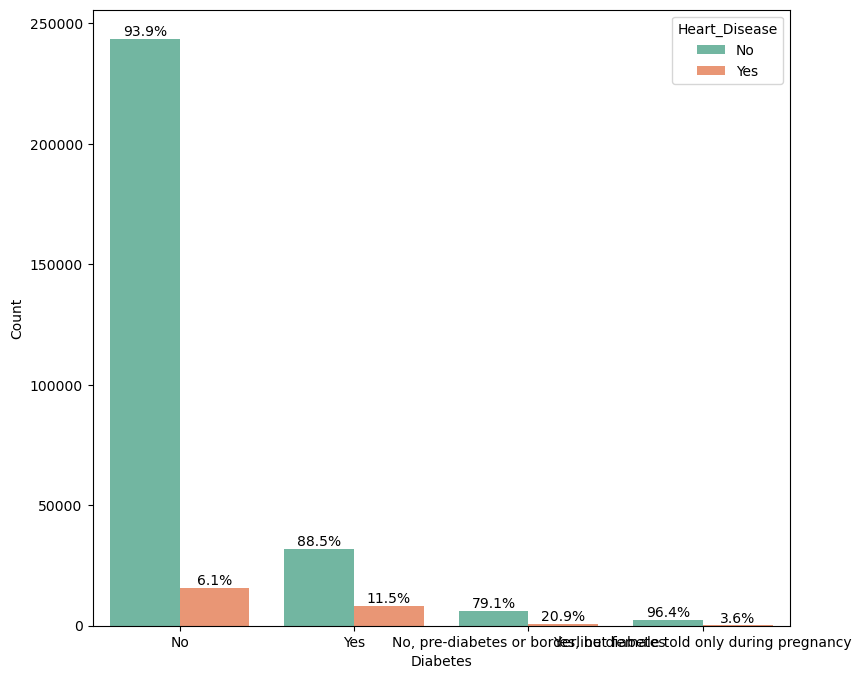

Exercise vs. Heart_Disease


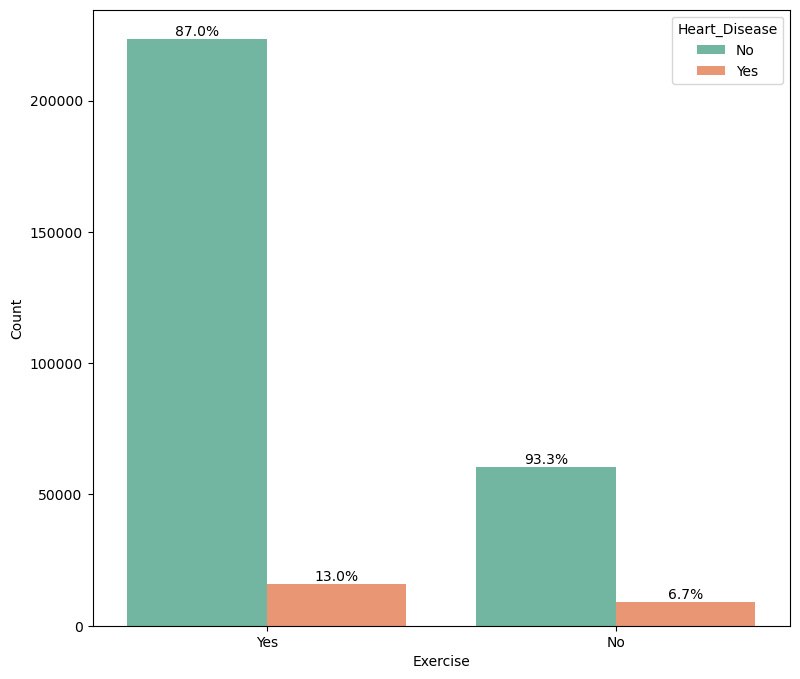

General_Health vs. Heart_Disease


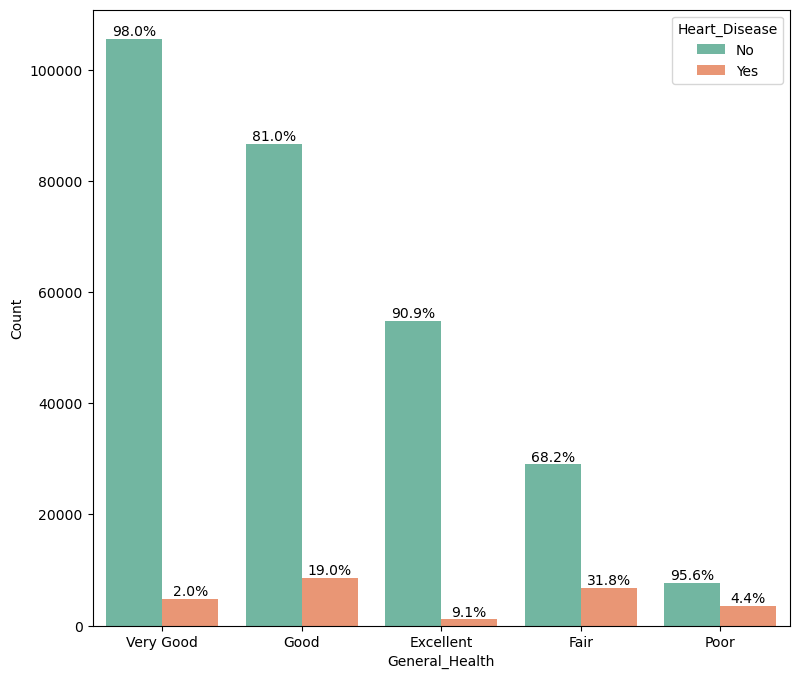

Other_Cancer vs. Heart_Disease


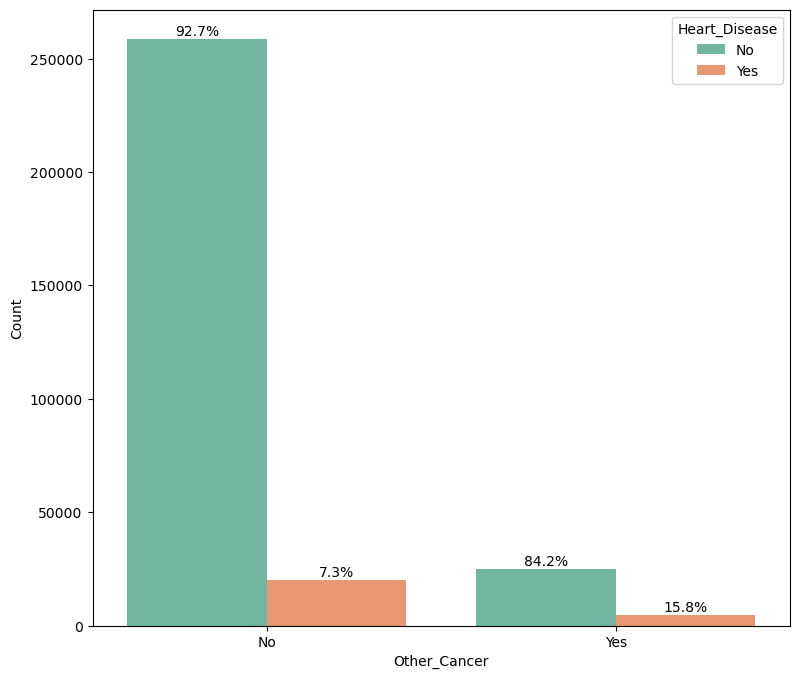

Sex vs. Heart_Disease


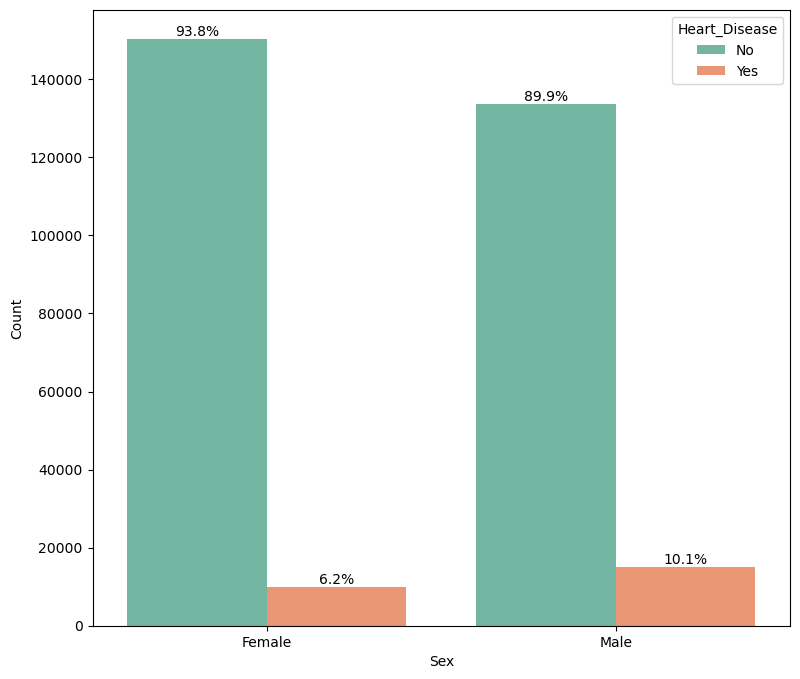

Skin_Cancer vs. Heart_Disease


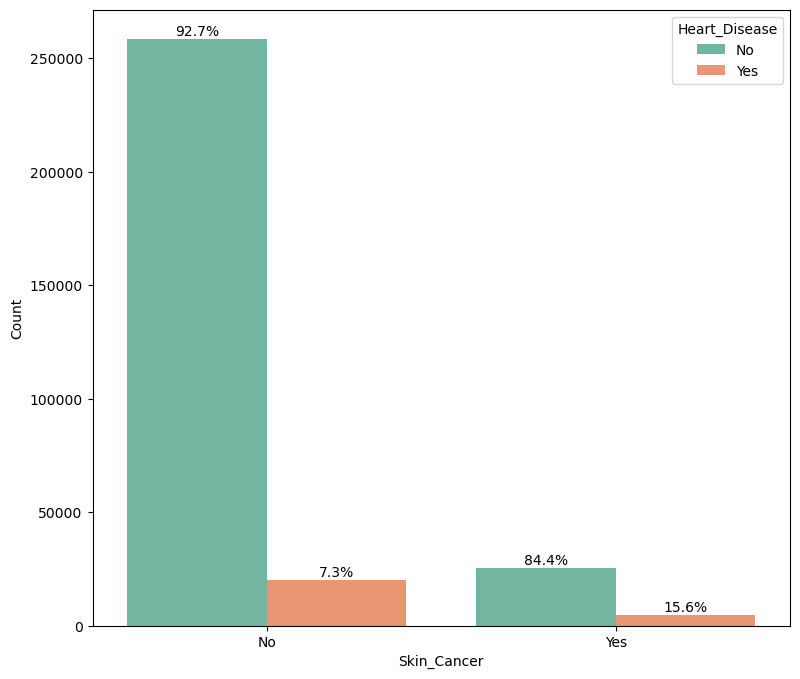

Smoking_History vs. Heart_Disease


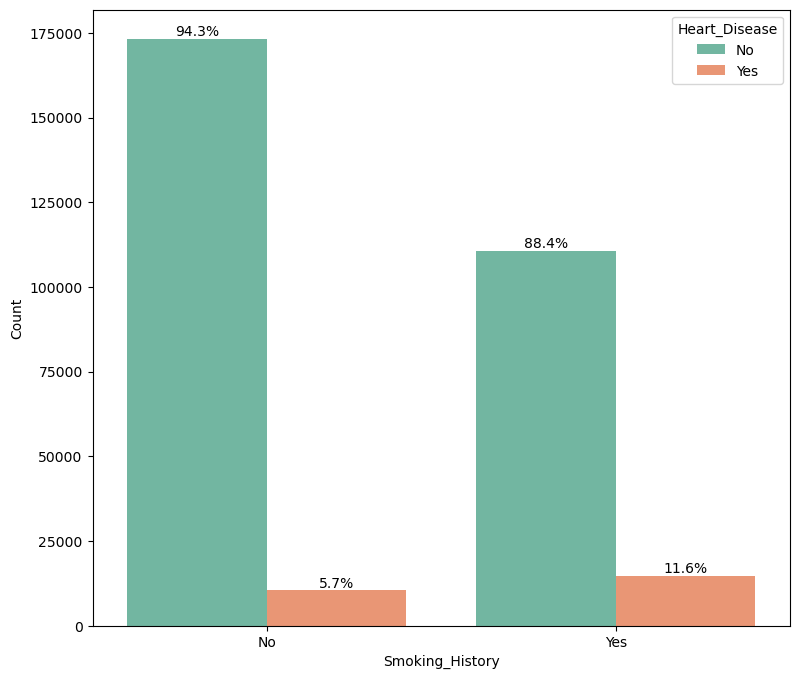

In [10]:
for i in categorical:
    if i == target:
        continue

    if df[i].nunique() > 15:
        print(f"Column '{i}' has many unique values (n = {df[i].nunique()}) and will not be plotted")
        print('=======================================================')
        continue

    if i in df.columns:
        print(f"{i} vs. {target}")
        plot_bivariate_categorical(df, i, target)
        print('=======================================================')


#### Numerical

Alcohol_Consumption vs. Heart_Disease


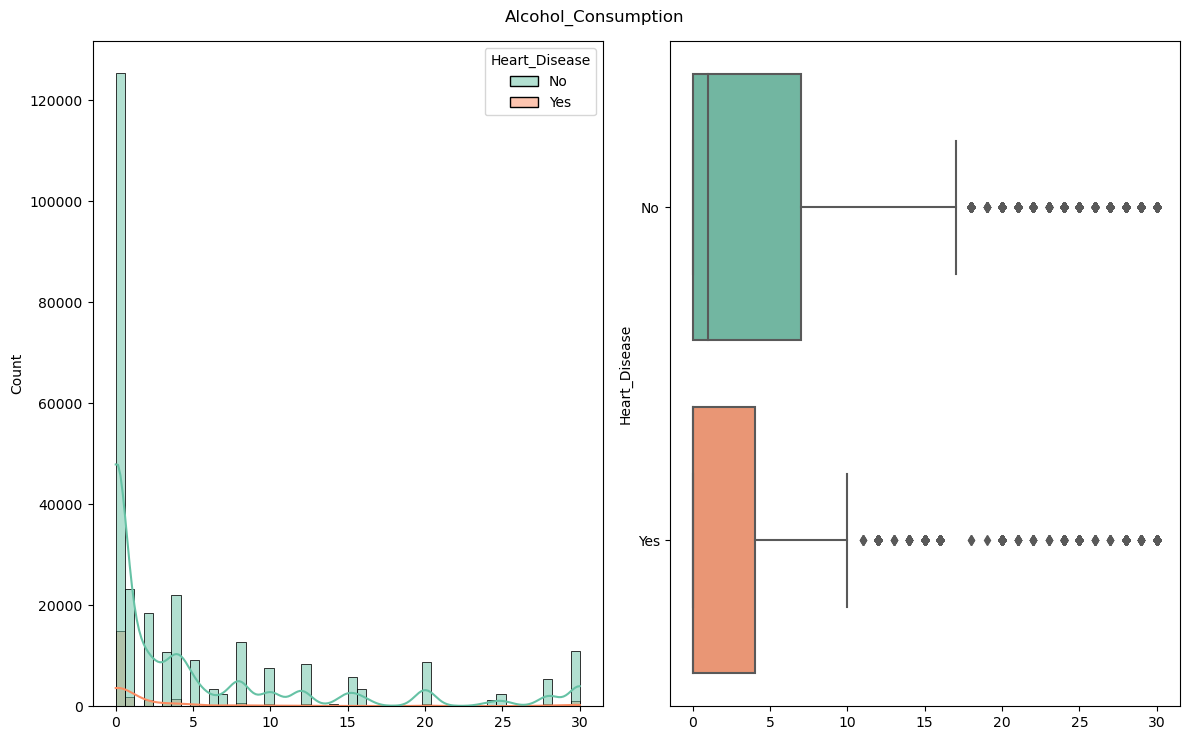

BMI vs. Heart_Disease


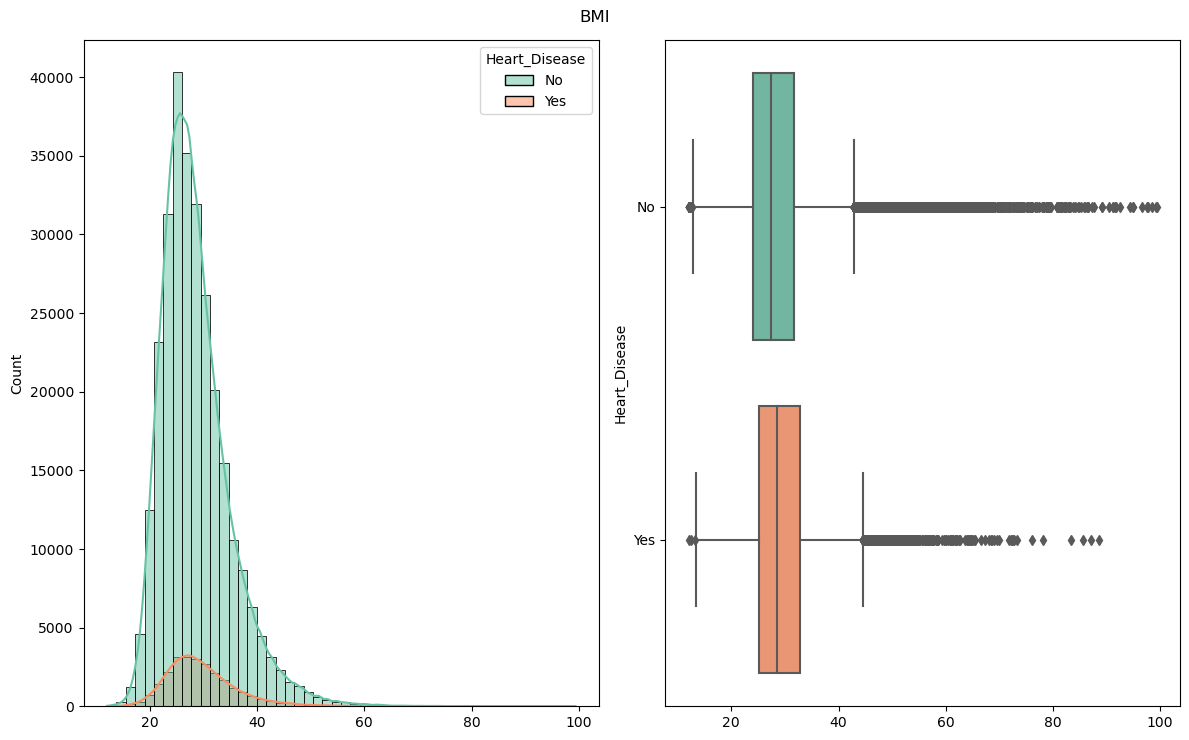

FriedPotato_Consumption vs. Heart_Disease


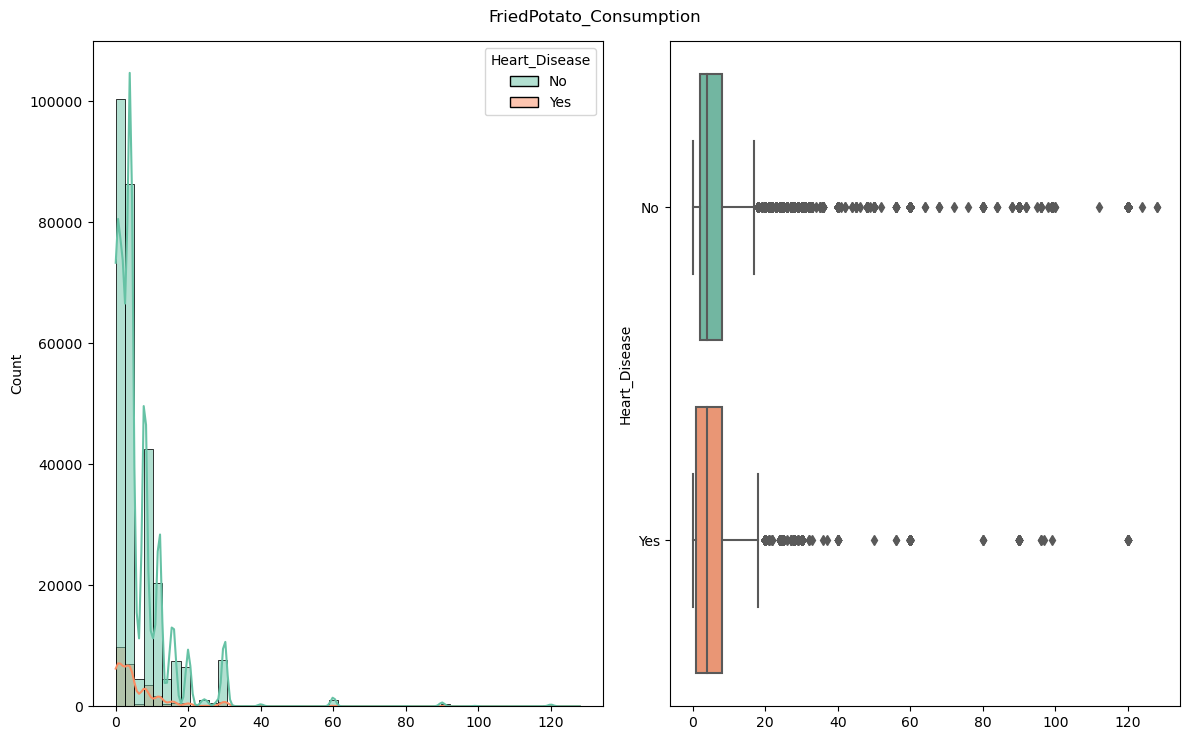

Fruit_Consumption vs. Heart_Disease


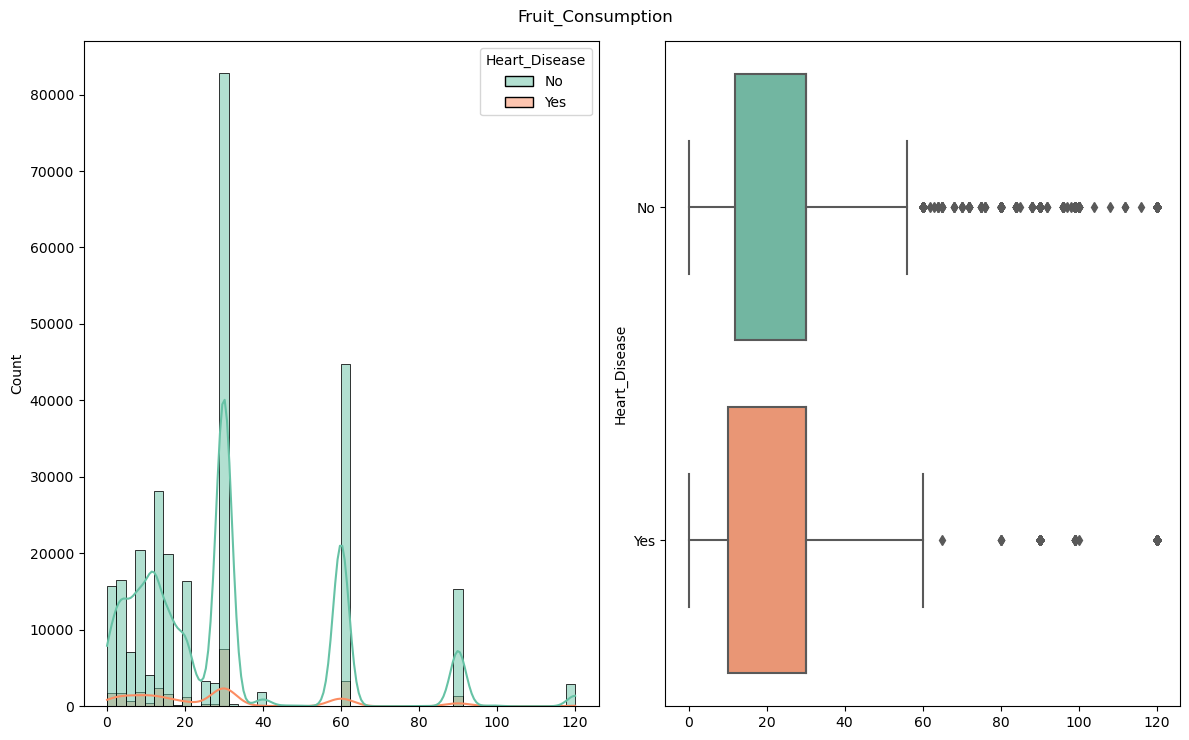

Green_Vegetables_Consumption vs. Heart_Disease


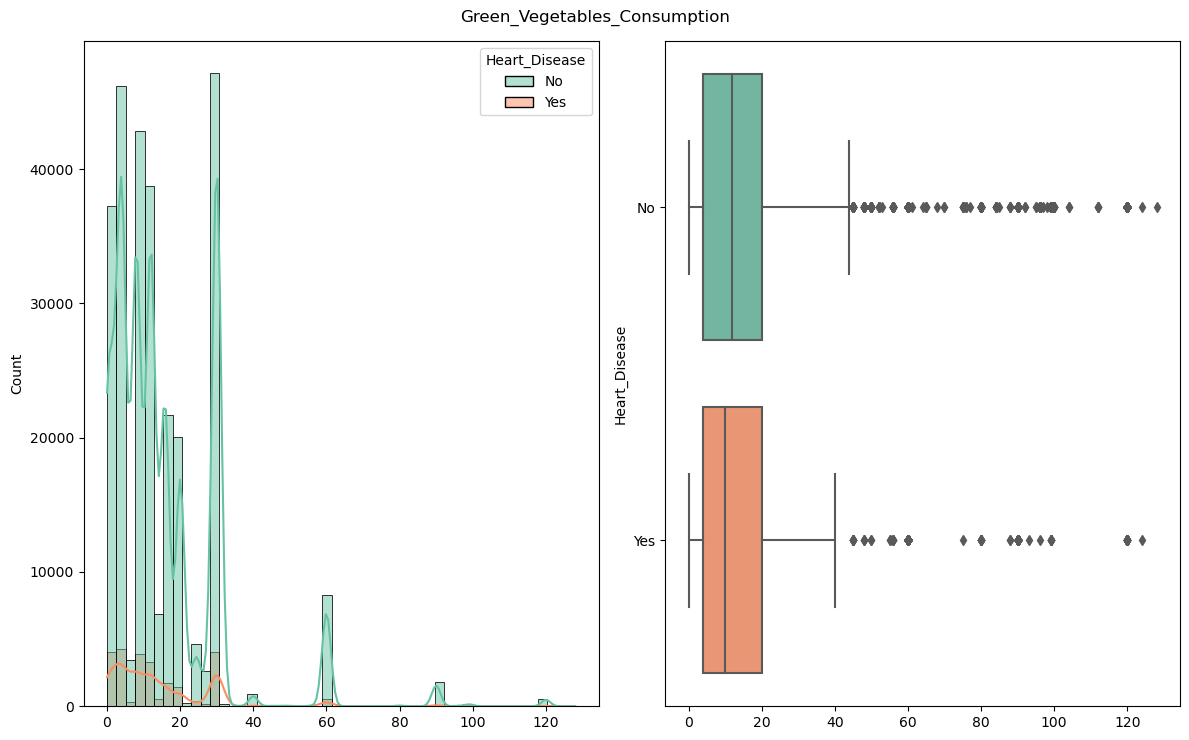

Height_(cm) vs. Heart_Disease


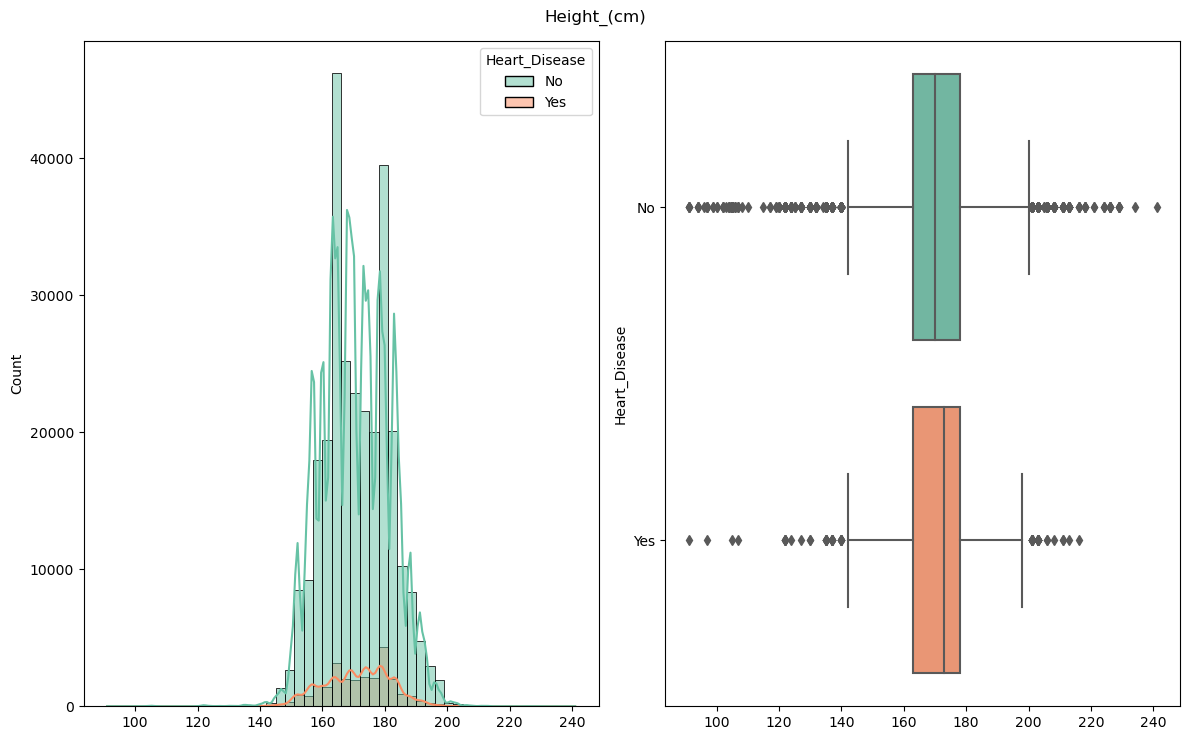

Weight_(kg) vs. Heart_Disease


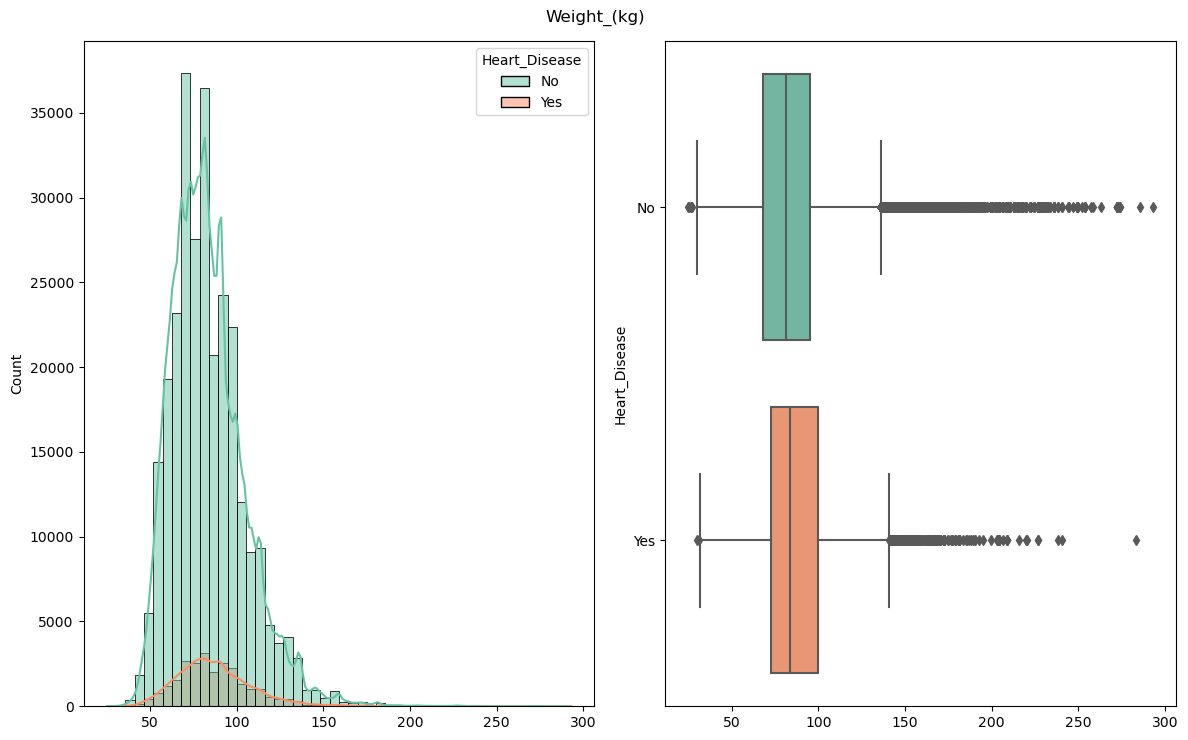

In [12]:
for i in numerical:
        if i == target:
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            plot_bivariate_numerical(
                    data = df,
                    column = i,
                    target = target,
                    color = 'Set2',
                    figsize=(12,7.5),
                    val=0)
            print('=======================================================')

### Multivariate Analysis

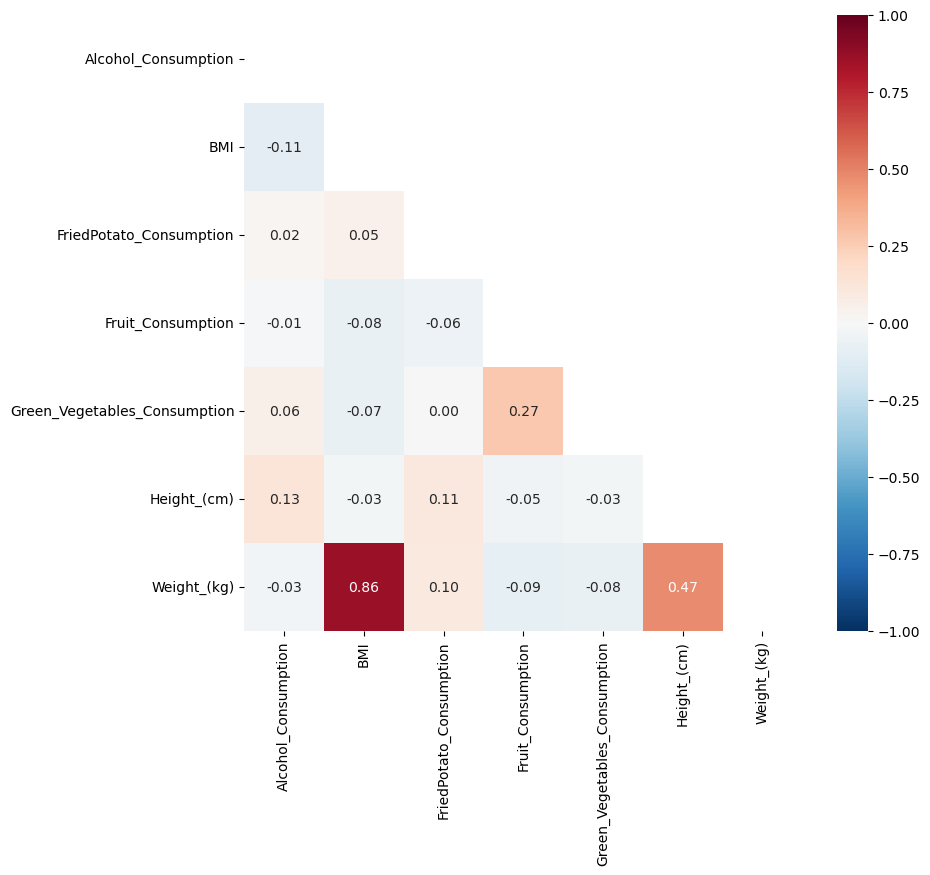

In [13]:
# Plotting the correlation matrix
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(9, 8))

# Create a mask to cover the upper diagonal in the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            cmap='RdBu_r',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1,
            mask=mask)

plt.show()


## Preprocessing 

Changing the values of Heart Disease to 0 and 1 for preprocessing steps

In [14]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


0    283883
1     24971
Name: Heart_Disease, dtype: int64


Splitting the train and test set. Using stratify to keep the ratio between two classes be the same

In [15]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2,random_state=22,stratify=df['Heart_Disease'])

print(train.shape)
print(test.shape)

(247083, 19)
(61771, 19)


Showing the ratio of the target variable from train and test set

In [16]:
def calculate_ratio(df, column):
    yes = df[column].value_counts()[0] / len(df[column]) * 100
    no = df[column].value_counts()[1] / len(df[column]) * 100
    return yes, no

train_ratio_yes, train_ratio_no = calculate_ratio(train, 'Heart_Disease')
test_ratio_yes, test_ratio_no = calculate_ratio(test, 'Heart_Disease')

print('Train Set')
print(f'Ratio of people with heart disease to total: {train_ratio_yes}%')
print(f'Ratio of people without heart disease to total: {train_ratio_no}%')
print('')

print('Test Set')
print(f'Ratio of people with heart disease to total: {test_ratio_yes}%')
print(f'Ratio of people without heart disease to total: {test_ratio_no}%')


Train Set
Ratio of people with heart disease to total: 91.91486261701533%
Ratio of people without heart disease to total: 8.085137382984666%

Test Set
Ratio of people with heart disease to total: 91.91530005989866%
Ratio of people without heart disease to total: 8.084699940101341%


In [17]:
# Splitting the X and y variables in the train set
X_train = train.drop("Heart_Disease", axis=1).copy()
y_train = train["Heart_Disease"].copy()

# Splitting the X and y variables in the test set
X_test = test.drop("Heart_Disease", axis=1).copy()
y_test = test["Heart_Disease"].copy()


### Creating Pipelines

#### Categorical Pipeline

In [18]:
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', drop='first')
)

- The categorical pipeline will only consist of the OneHotEncoder transformation. This pipeline is designed specifically for the cleaned dataset, which does not contain any missing values.

#### Numerical Pipeline

In [19]:
num_pipeline = make_pipeline(
                             FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                             StandardScaler()
                            )   

The numerical pipeline incorporates two methods:

1. Log Transform: Based on the exploratory data analysis (EDA), it is observed that many of the numerical variables are right-skewed. Applying a log transformation by taking the log(x+1) of each variable helps rectify the distribution.

2. Standard Scaler: The numerical variables will undergo standard scaling, which ensures that all variables are transformed to have the same scale.

#### Ordinal Pipelines

In [20]:
# Age Category Pipeline
agecat_pipeline = make_pipeline(
    OrdinalEncoder()
)

# General Health Pipeline
genhealth_pipeline = make_pipeline(
    OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']])
)

# Checkup Pipeline
checkup_pipeline = make_pipeline(
    OrdinalEncoder(categories=[['Within the past year', 'Within the past 2 years', 
                                'Within the past 5 years', '5 or more years ago', 'Never']])
)

    - For ordinal variables, the values are transformed based on their order. The lowest-order value is assigned a value of 0, and subsequent values increase by 1. This transformation ensures that the encoded values reflect the ordinal relationship between the categories.

#### Creating the pipeline lists

In [21]:
## Setting each column to the pipeline where they will be used
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']

#### Finalizing the preprocessing pipeline

In [22]:
## Combining all the pipelines and creating a main pipeline to enter all the data
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age_Category',agecat_pipeline,['Age_Category']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('Gen_health',genhealth_pipeline,['General_Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Arthritis', 'Depression', 'Diabetes',
                                  'Exercise', 'Other_Cancer', 'Sex',
                                  'Skin_Cancer', 'Smoking_History']),
                                ('Age_Category',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Age_Category']),...
                                                                              'Excellent']]))]),
                                 ['General_Health']),
                                ('Numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])

In [23]:
## Using preprocessing pipeline
print('Shape before the preprocessing:')
print(X_train.shape)

train_preprocessed = preprocessing.fit_transform(X_train)

print('Shape after the preprocessing:')
print(train_preprocessed.shape)

Shape before the preprocessing:
(247083, 18)
Shape after the preprocessing:
(247083, 20)


## Model Training

Creating a stratified Kfold for cross validating the test set in different machine learning models

In [24]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=22)

In [25]:
models = {
    'Logistic_Regression':LogisticRegression(max_iter=10000,random_state=22),
    'Decision Tree':DecisionTreeClassifier(random_state=22),
    'Random_Forest':RandomForestClassifier(n_estimators=100,random_state=22),
    'K-Nearest_Neighbor':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
}

scores_dict = {}

report_dict = {}

Trying all the models and getting their cross validation score and showing its classification report.

In [26]:
for model_name,model in models.items():
    model_pipeline = make_pipeline(preprocessing,
                              SMOTE(random_state=22),
                              model  
                                )
    scores = cross_val_score(model_pipeline, 
                            X_train, 
                            y_train, 
                            scoring='f1', 
                            cv=kf,
                            # verbose=1,
                            n_jobs=-1,
                            )
    model_score_mean = np.mean(scores)
    scores_dict[model_name] = model_score_mean
    print('------------------------------------------------------------')
    print(f'The score for {model_name} is {model_score_mean}')

    ## fitting the pipeline for classification report
    model_pipeline.fit(X_train,y_train)

    prediction = model_pipeline.predict(X_train)

    report = classification_report(y_train, prediction, output_dict=True)
    report_dict[model_name] = report
    print('')
    print(f'This is the classification report for {model_name}:')
    report_df = pd.DataFrame(report).T
    print(report_df)
    print('------------------------------------------------------------')
    

------------------------------------------------------------
The score for Logistic_Regression is 0.325704924546072

This is the classification report for Logistic_Regression:
              precision    recall  f1-score        support
0              0.975126  0.731742  0.836082  227106.000000
1              0.205293  0.787806  0.325710   19977.000000
accuracy       0.736275  0.736275  0.736275       0.736275
macro avg      0.590210  0.759774  0.580896  247083.000000
weighted avg   0.912884  0.736275  0.794818  247083.000000
------------------------------------------------------------
------------------------------------------------------------
The score for Decision Tree is 0.22236536988625638

This is the classification report for Decision Tree:
              precision    recall  f1-score        support
0              0.999982  1.000000  0.999991  227106.000000
1              1.000000  0.999800  0.999900   19977.000000
accuracy       0.999984  0.999984  0.999984       0.999984
macro a